In [238]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [239]:
df = yf.download('005930.KS','2021-06-03','2023-06-03')
df.to_excel("삼성전자.xlsx")
df.to_csv("삼성전자.csv")

[*********************100%%**********************]  1 of 1 completed


In [240]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,81300.0,83000.0,81100.0,82800.0,78860.289062,29546007
2021-06-04,82700.0,82700.0,81500.0,82200.0,78288.851562,18112259
2021-06-07,82700.0,82800.0,81600.0,81900.0,78003.117188,16496197
2021-06-08,82300.0,82600.0,81800.0,81900.0,78003.117188,12781226
2021-06-09,81500.0,82000.0,81100.0,81100.0,77241.187500,14908823
...,...,...,...,...,...,...
2023-05-26,69800.0,70400.0,69500.0,70300.0,69950.921875,19549511
2023-05-30,71300.0,72300.0,71200.0,72300.0,71940.984375,27476897
2023-05-31,72400.0,72500.0,71000.0,71400.0,71045.453125,25666087


In [241]:
df.shape

(493, 6)

In [242]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)
dfx = df[['Open', 'High', 'Low', 'Close', 'Volume']]
dfx = MinMaxScaler(dfx)

dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]

dfx

,Open,High,Low,Volume
Date,,,,
2021-06-03,0.935484,0.989899,0.970199,0.482221
2021-06-04,0.980645,0.979798,0.983444,0.295611
2021-06-07,0.980645,0.983165,0.986755,0.269235
2021-06-08,0.967742,0.976431,0.993377,0.208603
2021-06-09,0.941935,0.956229,0.970199,0.243327
...,...,...,...,...
2023-05-26,0.564516,0.565657,0.586093,0.319068
2023-05-30,0.612903,0.629630,0.642384,0.448451
2023-05-31,0.648387,0.636364,0.635762,0.418897


In [243]:
time_step = 10
step = 1

def create_dataset(X, y, time_step, step):
    Xs, ys = [], []

    for i in range(0, len(X) - time_step, step):
        v = X.iloc[i : (i + time_step)].values
        labels = y.iloc[i + time_step]

        Xs.append(v)
        ys.append(labels)

    return np.array(Xs), np.array(ys)

In [244]:
X, y = create_dataset(dfx, dfy, time_step, step)

X.shape

(483, 10, 4)

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((323, 10, 4), (160, 10, 4), (323, 1), (160, 1))

In [246]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(X.shape[1:]), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 10, 20)            500       
                                                                 
 dropout_55 (Dropout)        (None, 10, 20)            0         
                                                                 
 simple_rnn_29 (SimpleRNN)   (None, 20)                820       
                                                                 
 dropout_56 (Dropout)        (None, 20)                0         
                                                                 
 dense_49 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1341 (5.24 KB)
Trainable params: 1341 (5.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [247]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.33, shuffle=False)
y_pred = model.predict(X_test)

Epoch 1/70
7/7 [==============================] - 2s 55ms/step - loss: 0.4031 - val_loss: 0.0154
Epoch 2/70
7/7 [==============================] - 0s 10ms/step - loss: 0.2567 - val_loss: 0.0036
Epoch 3/70
7/7 [==============================] - 0s 10ms/step - loss: 0.2045 - val_loss: 0.0030
Epoch 4/70
7/7 [==============================] - 0s 10ms/step - loss: 0.1738 - val_loss: 0.0046
Epoch 5/70
7/7 [==============================] - 0s 10ms/step - loss: 0.1448 - val_loss: 0.0059
Epoch 6/70
7/7 [==============================] - 0s 9ms/step - loss: 0.1328 - val_loss: 0.0069
Epoch 7/70
7/7 [==============================] - 0s 9ms/step - loss: 0.1049 - val_loss: 0.0072
Epoch 8/70
7/7 [==============================] - 0s 10ms/step - loss: 0.1140 - val_loss: 0.0085
Epoch 9/70
7/7 [==============================] - 0s 10ms/step - loss: 0.0973 - val_loss: 0.0099
Epoch 10/70
7/7 [==============================] - 0s 10ms/step - loss: 0.0854 - val_loss: 0.0126
Epoch 11/70
7/7 [==============

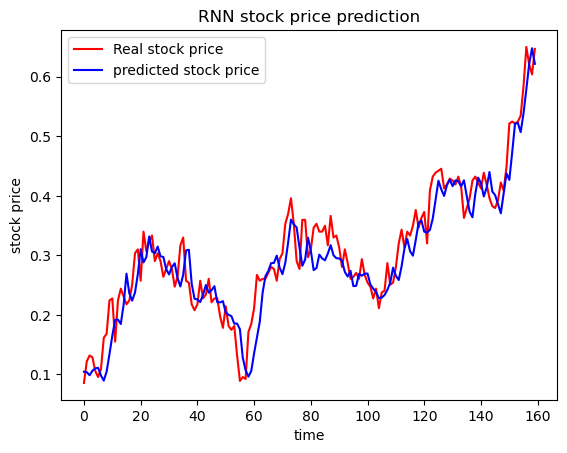

In [248]:
plt.plot(y_test, color='red', label='Real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('RNN stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [249]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
model2 = Sequential()
model2.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(10, 4)))
model2.add(Dropout(0.1))
model2.add(LSTM(units=64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(units=1))
model2.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 10, 64)            17664     
                                                                 
 dropout_57 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_23 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 50753 (198.25 KB)
Trainable params: 50753 (198.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [250]:
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train, epochs=70, batch_size=30)
pred_y = model2.predict(X_test)

Epoch 1/70
11/11 [==============================] - 3s 9ms/step - loss: 0.2296
Epoch 2/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0394
Epoch 3/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 4/70
11/11 [==============================] - 0s 11ms/step - loss: 0.0127
Epoch 5/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 6/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 7/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 8/70
11/11 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 9/70
11/11 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 10/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 11/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0062
Epoch 12/70
11/11 [==============================] - 0s 10ms/step - loss: 0.0072
Epoch 13/70
11/11 [======================

5/5 [==============================] - 0s 5ms/step


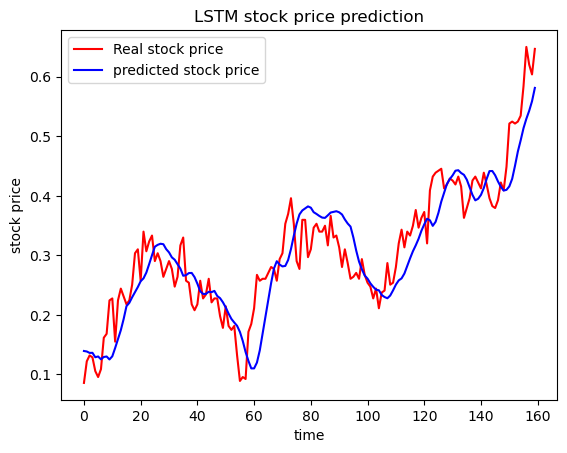

In [251]:
pred_y = model2.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='Real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('LSTM stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [252]:
model3 = Sequential()
model3.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(10,4)))
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_23 (Conv1D)          (None, 8, 128)            1664      
                                                                 
 conv1d_24 (Conv1D)          (None, 6, 64)             24640     
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 3, 64)             0         
 ng1D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 192)               0         
                                                                 
 dense_51 (Dense)            (None, 100)               19300     
                                                                 
 dense_52 (Dense)            (None, 1)                 101       
                                                     

In [253]:
model3.compile(optimizer='adam', loss='mean_squared_error')
model3.fit(X_train, y_train, epochs=70, batch_size=30)
pred_y = model3.predict(X_test)

Epoch 1/70
11/11 [==============================] - 1s 3ms/step - loss: 0.0577
Epoch 2/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0271
Epoch 3/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 4/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 5/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 6/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 7/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 8/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 9/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 10/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 11/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 12/70
11/11 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 13/70
11/11 [==============================

5/5 [==============================] - 0s 2ms/step


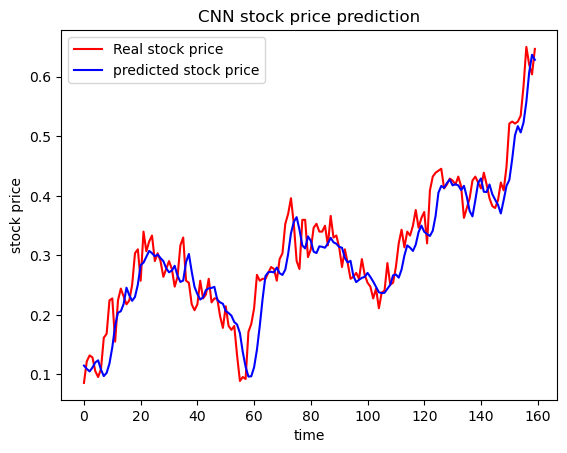

In [254]:
pred_y = model3.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='Real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('CNN stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()